# Melbourne Housing Market - Price Prediction

# 1/ Import Library

In [157]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Useful Library
import numpy as np
import pandas as pd
import os

# Visualize Library
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
%matplotlib inline

# pd.set_eng_float_format(accuracy=1, use_eng_prefix=True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# 2/ Loading Data

In [158]:
PATH = "datasets/Melbourne_housing_FULL.csv"

def load_housing_data(PATH):
    return pd.read_csv(PATH)

In [159]:
data = load_housing_data(PATH)

# 3/ Exploratory Data Analysis ( EDA )

## 3.1/ Take a quick look on Data Structure

In [160]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [161]:
data.shape

(34857, 21)

In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [163]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


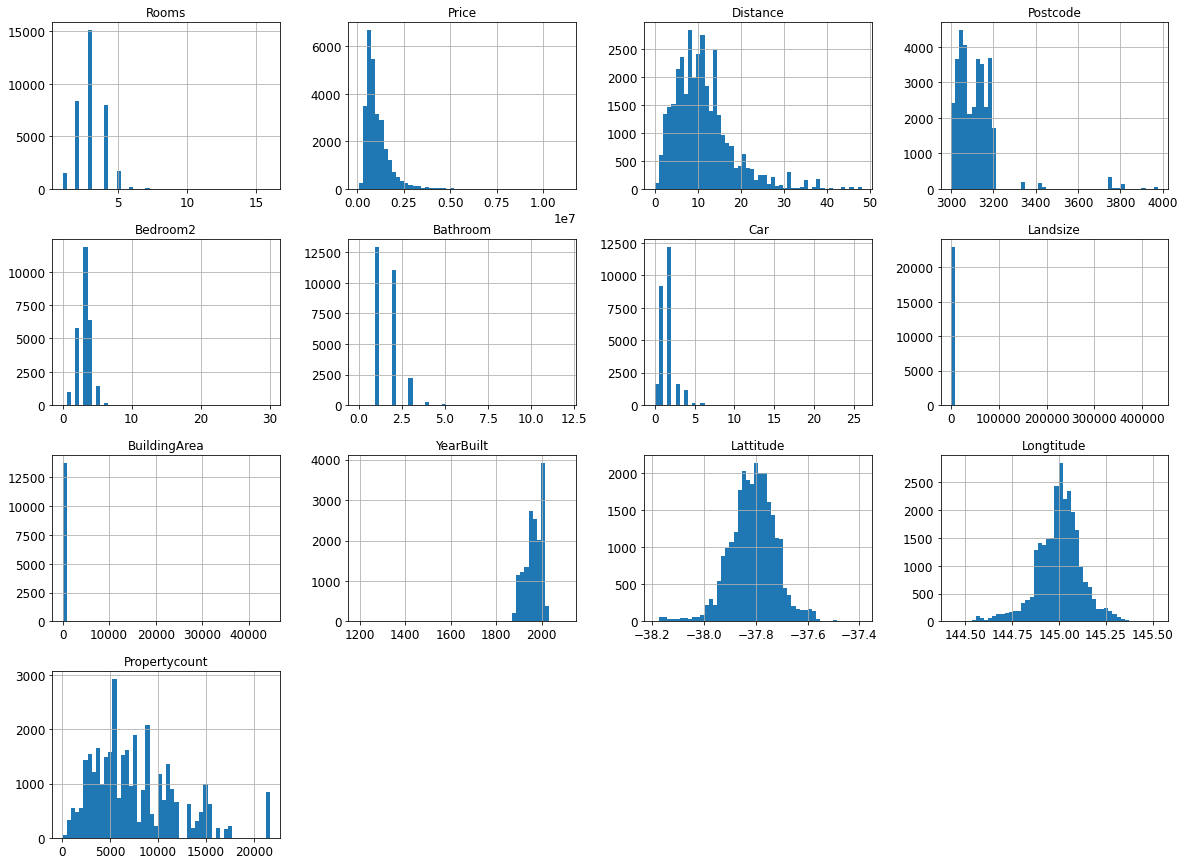

In [164]:
data.hist(bins=50, figsize=(20, 15))
plt.show()

In [165]:
housing = data.copy()
housing=housing[housing.Price.notnull()]

In [166]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27247 entries, 1 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         27247 non-null  object 
 1   Address        27247 non-null  object 
 2   Rooms          27247 non-null  int64  
 3   Type           27247 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         27247 non-null  object 
 6   SellerG        27247 non-null  object 
 7   Date           27247 non-null  object 
 8   Distance       27246 non-null  float64
 9   Postcode       27246 non-null  float64
 10  Bedroom2       20806 non-null  float64
 11  Bathroom       20800 non-null  float64
 12  Car            20423 non-null  float64
 13  Landsize       17982 non-null  float64
 14  BuildingArea   10656 non-null  float64
 15  YearBuilt      12084 non-null  float64
 16  CouncilArea    27244 non-null  object 
 17  Lattitude      20993 non-null  float64
 18  Longti

## 3.2/ Check any null Values and duplicate entries

In [167]:
from eda import *


Preview of housing with null values:


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0
10,Abbotsford,129 Charles St,2,h,941000.0,S,Jellis,7/05/2016,2.5,3067.0,2.0,1.0,0.0,181.0,NaN,NaN,Yarra City Council,-37.8041,144.9953,Northern Metropolitan,4019.0


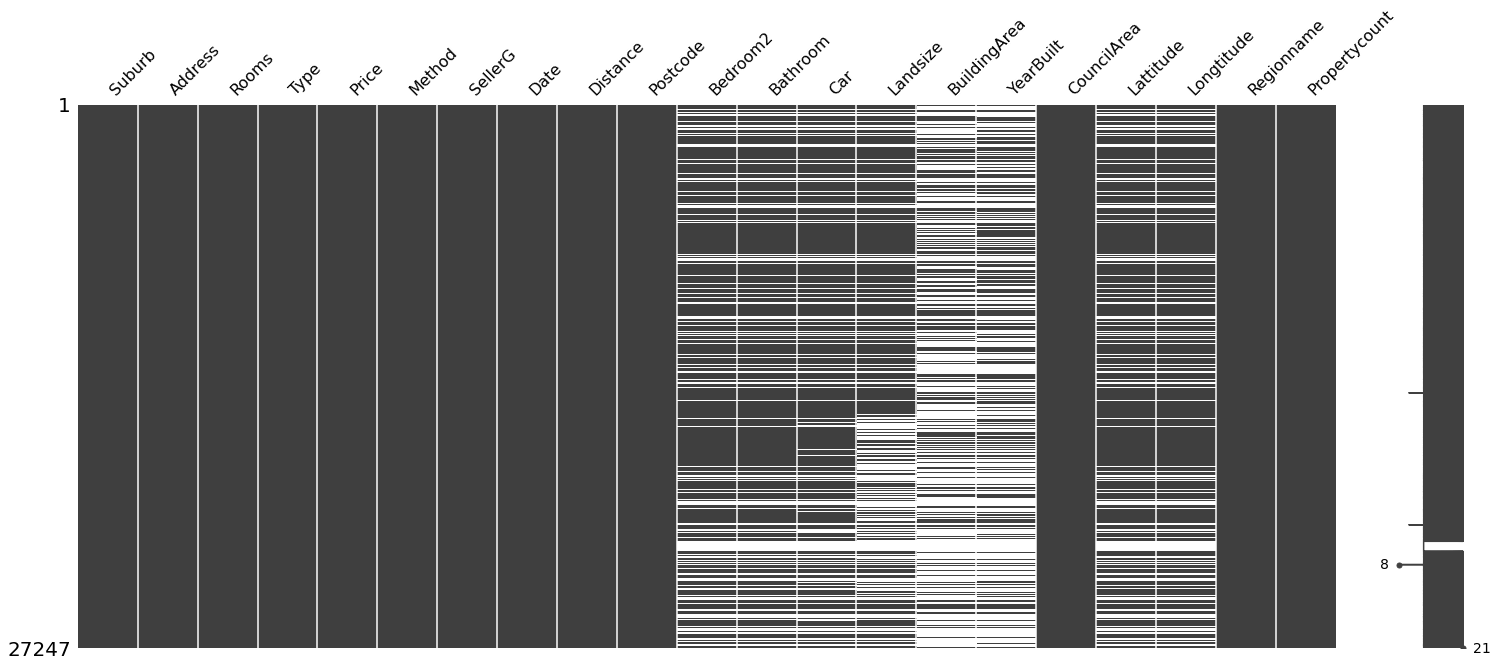


No duplicated entries found


In [168]:
# generate preview of entries with null values
if len(housing[housing.isnull().any(axis=1)] != 0):
    print("\nPreview of housing with null values:")
    display(housing[housing.isnull().any(axis=1)].head(3))
    missingno.matrix(housing)
    plt.show()

# generate count statistics of duplicate entries
if len(housing[housing.duplicated()]) > 0:
    print("\n***Number of duplicated entries: ", len(housing[housing.duplicated()]))
    display(housing[housing.duplicated(keep=False)].sort_values(by=list(housing.columns)).head())
else:
    print("\nNo duplicated entries found")

## 3.3/ Plot distribution of numeric data 



To check: 
Distribution of numeric data


,count,mean,std,min,25%,50%,75%,max
Rooms,27247.0,2.992293e+00,0.954795,1.00000,2.0000,3.00000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.0000,870000.00000,1.295000e+06,1.120000e+07
Distance,27246.0,1.128028e+01,6.787469,0.00000,6.4000,10.50000,1.400000e+01,4.810000e+01
Postcode,27246.0,3.113796e+03,111.139676,3000.00000,3046.0000,3088.00000,3.153000e+03,3.978000e+03
Bedroom2,20806.0,3.046237e+00,0.955122,0.00000,2.0000,3.00000,4.000000e+00,2.000000e+01
Bathroom,20800.0,1.591683e+00,0.700880,0.00000,1.0000,1.00000,2.000000e+00,9.000000e+00
Car,20423.0,1.715370e+00,0.994216,0.00000,1.0000,2.00000,2.000000e+00,1.800000e+01
Landsize,17982.0,5.934889e+02,3757.266429,0.00000,219.0000,512.00000,6.640000e+02,4.330140e+05
BuildingArea,10656.0,1.568346e+02,449.222791,0.00000,100.0000,133.00000,1.820000e+02,4.451500e+04
YearBuilt,12084.0,1.966609e+03,36.762373,1196.00000,1950.0000,1970.00000,2.000000e+03,2.019000e+03


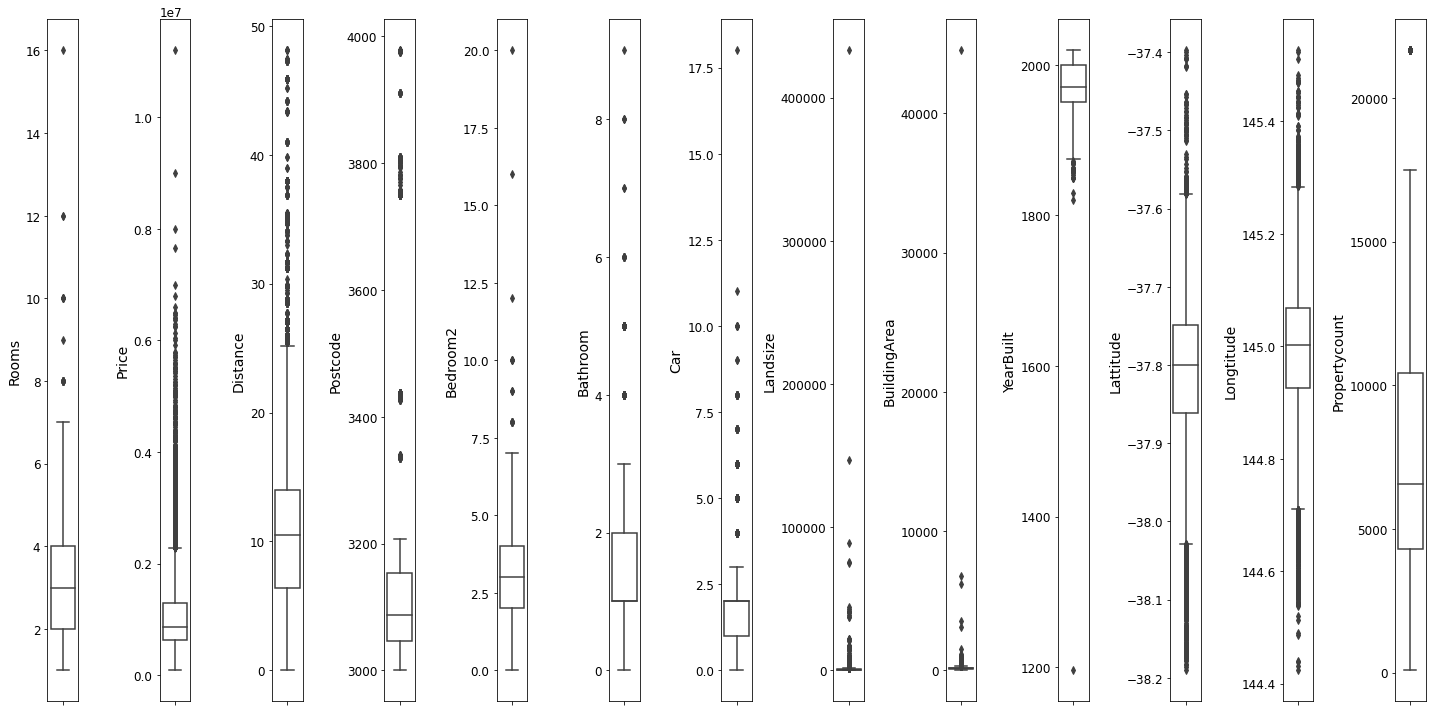


To check pairwise joint distribution of numeric data


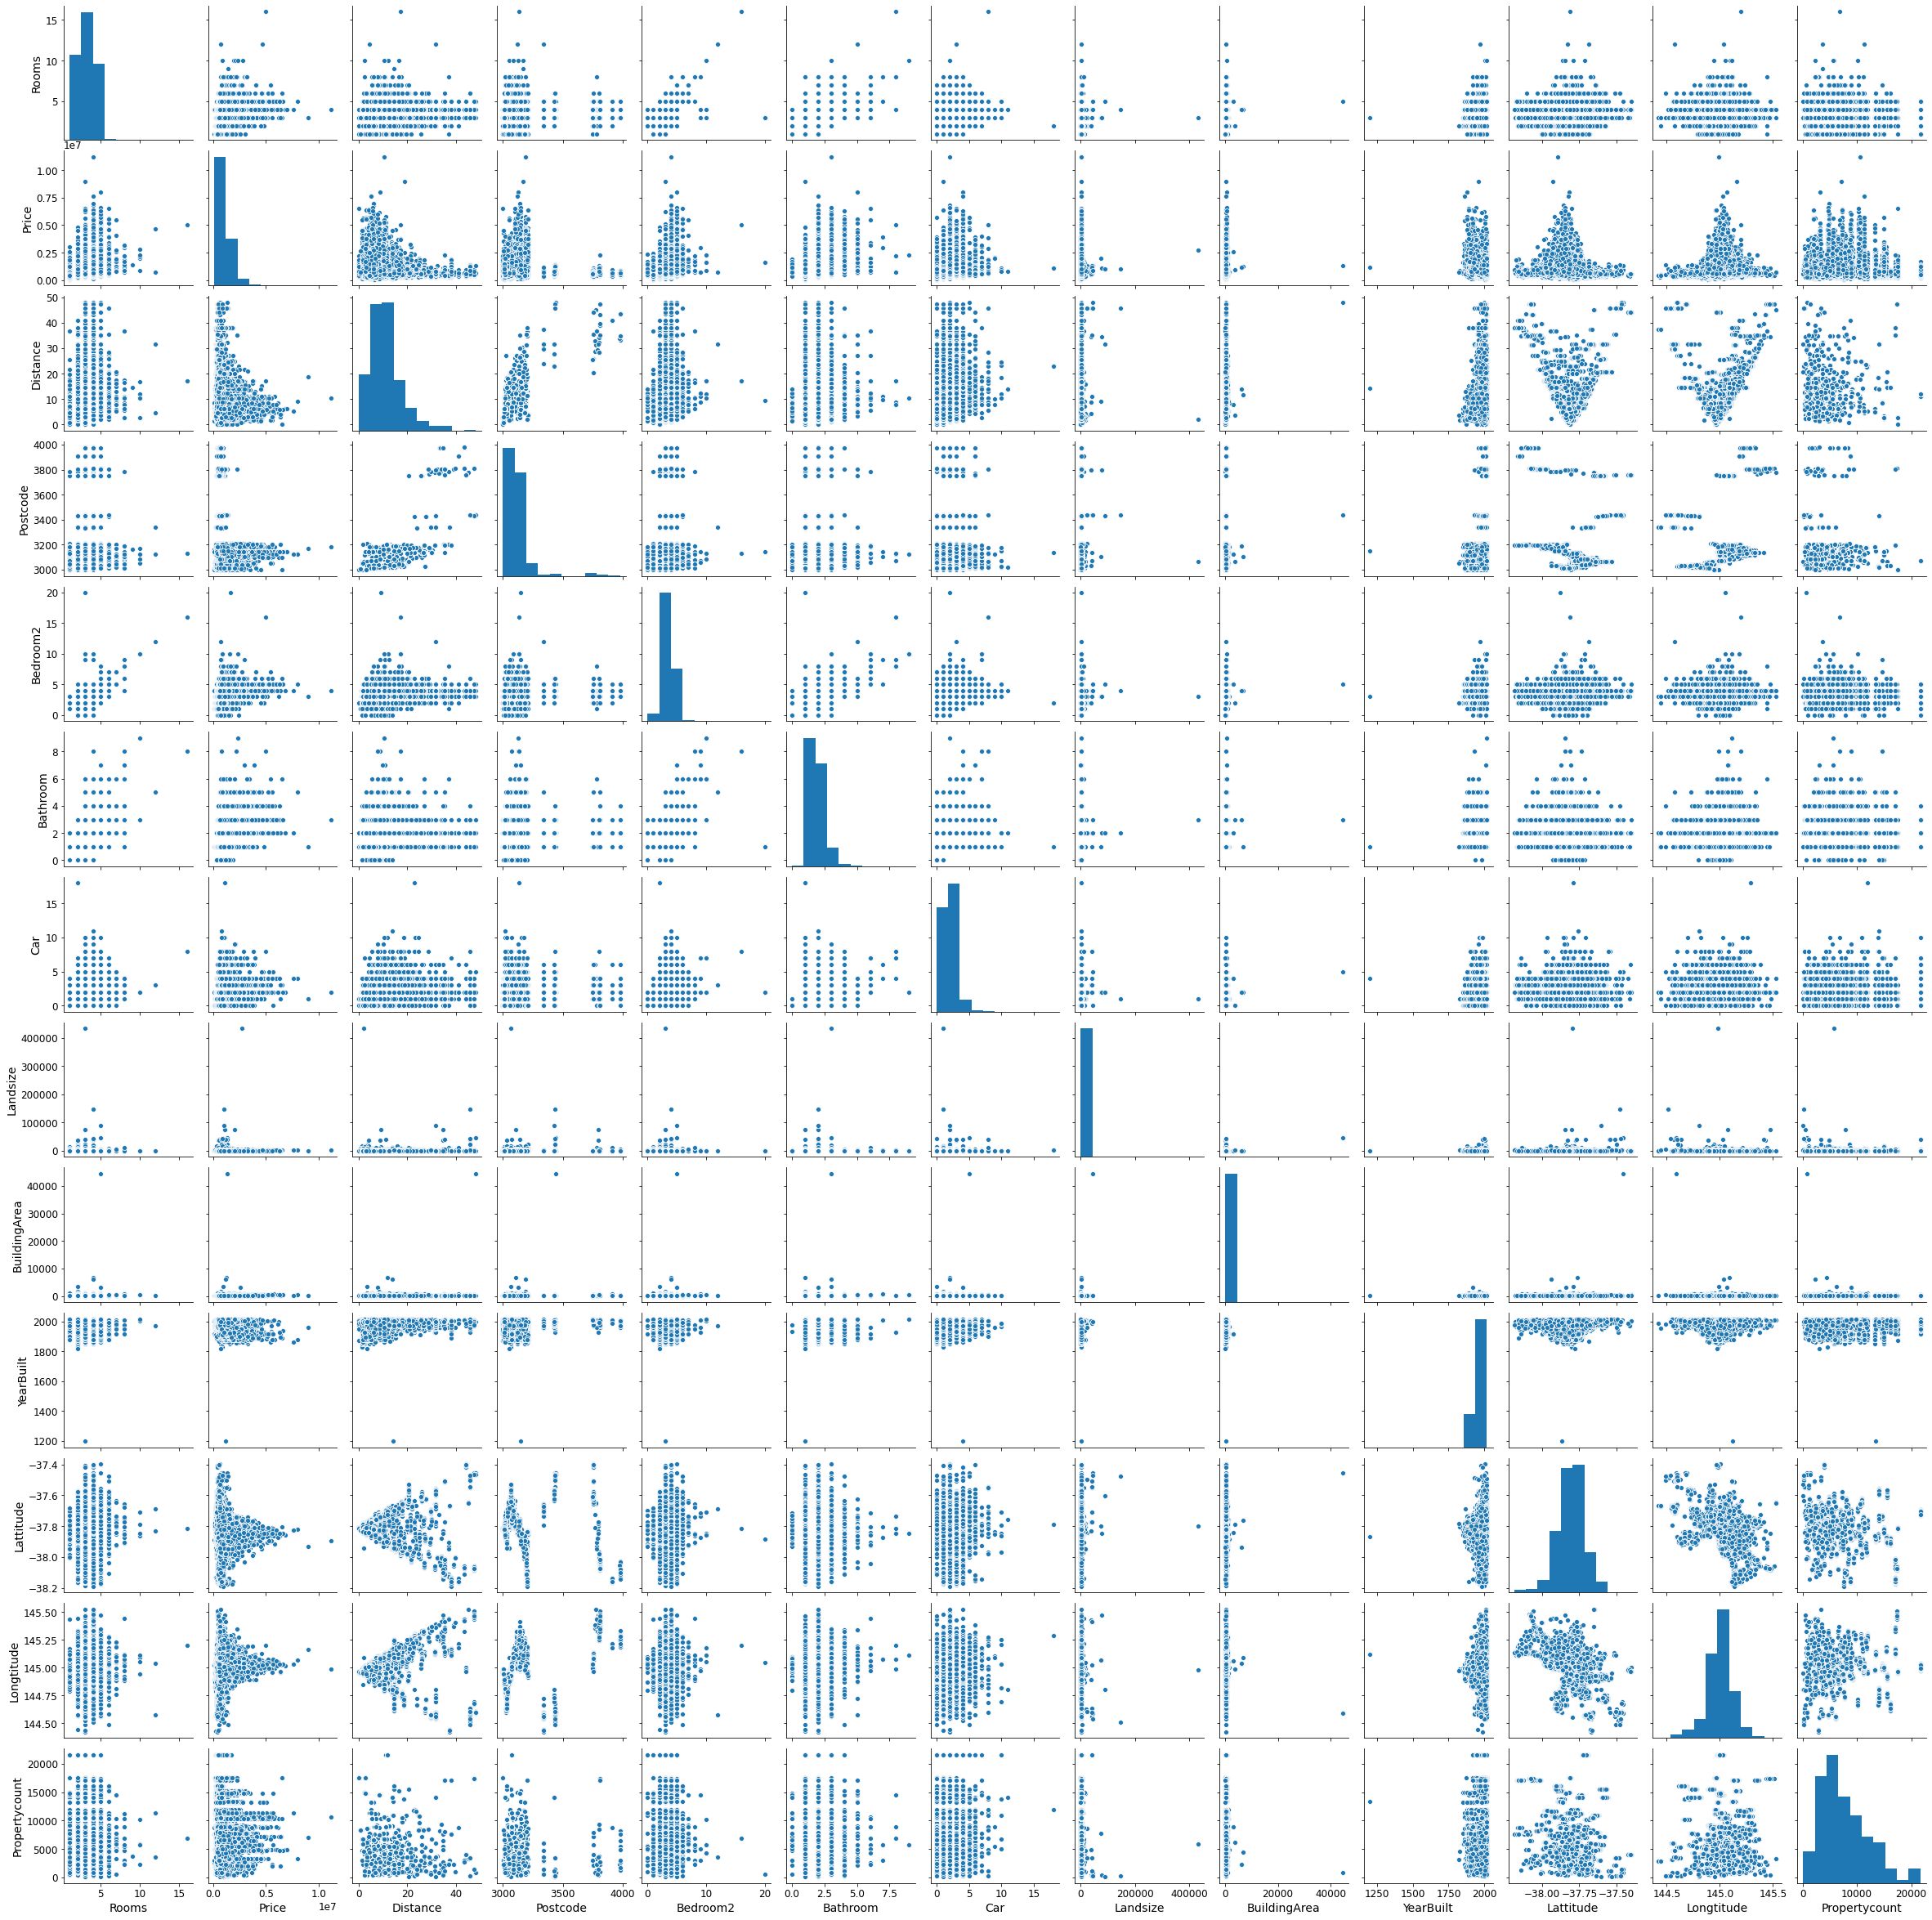

In [169]:
numeric_eda(housing)

## 3.4/ Plot count distribution of categorical data

In [170]:
categorical_eda(housing)


To check: 
Unique count of non-numeric data

Suburb           345
Address        26751
Type               3
Method             5
SellerG          349
Date              78
CouncilArea       33
Regionname         8
dtype: int64
Top 5 unique values of Suburb
           Suburb  Count
0       Reservoir    727
1  Bentleigh East    493
2        Richmond    439
3         Preston    415
4       Brunswick    387
 
Top 5 unique values of Address
           Address  Count
0     5 Charles St      4
1    53 William St      3
2  14 Northcote St      3
3   7 Churchill Av      3
4    5 Margaret St      3
 
Top 5 unique values of Type
  Type  Count
0    h  18472
1    u   5909
2    t   2866
 
Top 5 unique values of Method
  Method  Count
0      S  17515
1     SP   3603
2     PI   3255
3     VB   2684
4     SA    190
 
Top 5 unique values of SellerG
         SellerG  Count
0         Nelson   2735
1         Jellis   2532
2          Barry   2393
3  hockingstuart   2110
4            Ray   1581
 
Top 5 uniqu

## 3.5/ Looking for Target's Correlation

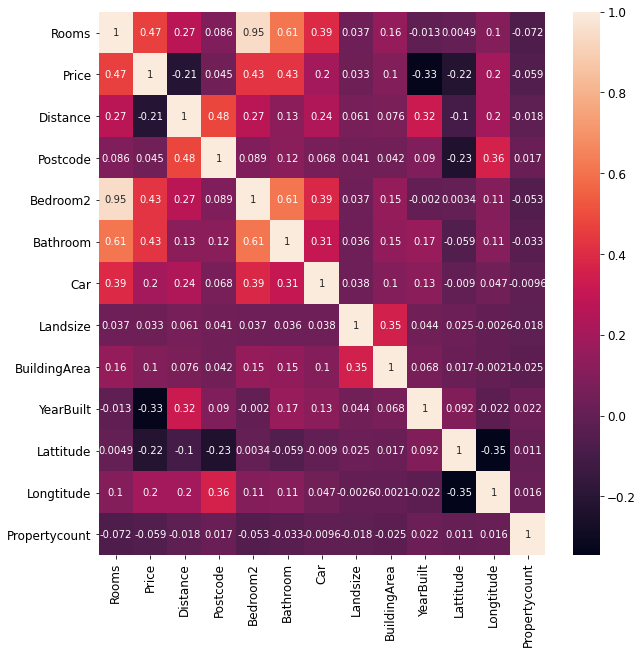

In [171]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 10)) 
sns.heatmap(data.corr(), annot=True);

In [172]:
corr_matrix = data.corr()

In [173]:
corr_matrix["Price"].sort_values(ascending=False)

Price            1.000000
Rooms            0.465238
Bedroom2         0.430275
Bathroom         0.429878
Car              0.201803
Longtitude       0.197874
BuildingArea     0.100754
Postcode         0.044950
Landsize         0.032748
Propertycount   -0.059017
Distance        -0.211384
Lattitude       -0.215607
YearBuilt       -0.333306
Name: Price, dtype: float64

In [174]:
housing.drop(["Address", "Postcode", "Propertycount", "BuildingArea"],axis=1,inplace=True)

In [175]:
columns = list(housing.columns)
cat_attrb = ["Suburb", "Type", "Method", "SellerG", "Date", "CouncilArea", "Regionname"]
num_attrb = [i for i in columns if i not in cat_attrb]

In [176]:
len(housing.columns)

17

## 3.6/ Details

*Find unique value in categorical attributes*

In [180]:
for i in cat_attrb:
    print(i, ":" ,len(housing[i].unique()))

Suburb : 345
Type : 3
Method : 5
SellerG : 349
Date : 78
CouncilArea : 34
Regionname : 9


*Percentage of missing value in each attributes*

In [181]:
def null_values_column_percentage(d):
    attrs = d.columns
    flag = True
    for attr in attrs:
        if d[attr].isnull().any():
            flag = False
            print(attr,':',round(float((d[attr].isnull().sum()/d.shape[0])*100), 3), "%")
    if flag:
        print("Nothing is missing !!!")
null_values_column_percentage(data)

Price : 21.832 %
Distance : 0.003 %
Postcode : 0.003 %
Bedroom2 : 23.573 %
Bathroom : 23.599 %
Car : 25.039 %
Landsize : 33.881 %
BuildingArea : 60.576 %
YearBuilt : 55.386 %
CouncilArea : 0.009 %
Lattitude : 22.882 %
Longtitude : 22.882 %
Regionname : 0.009 %
Propertycount : 0.009 %


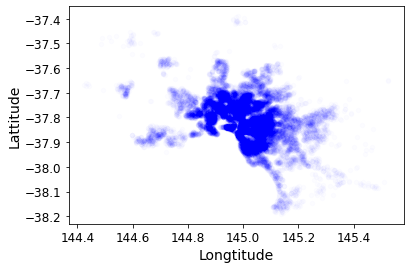

In [182]:
data.plot(kind="scatter", x="Longtitude", y="Lattitude", c="b", alpha=0.01);

# 4/ Data Cleaning

## 4.1/ Transform Price Attribute to Categorical

Divide Target Columns ( House Price ) into 3 classes 
 + High: 3 (2M - Inf AUD)
 + Medium : 2 (1 - 2M AUD)
 + Low : 1 (0 - 1M AUD)

<b>Target Attrbs</b>

In [183]:
price = housing["Price"].copy()

In [184]:
price = price/1000000

Text(0.5, 1.0, 'Price in Aus Dollar in million')

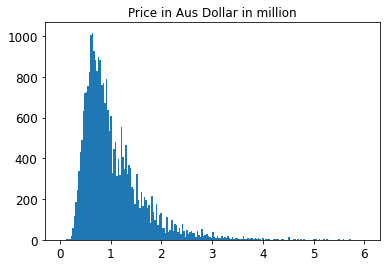

In [185]:
plt.hist(price, range=(0, 6), bins=200)
plt.title("Price in Aus Dollar in million")

In [186]:
housing["Price"] = pd.cut(price, bins=[0., 1.0, 2.0, np.inf], labels=[1, 2, 3])

In [187]:
housing["Price"].value_counts()

1    16497
2     8884
3     1866
Name: Price, dtype: int64

In [188]:
len(housing)

27247

In [189]:
pd.DataFrame(data=[16497/len(housing), 8884/len(housing), 1866/len(housing)],index= ["Low", "Medium", "High"], columns= ["Percentage"])

,Percentage
Low,0.605461
Medium,0.326054
High,0.068485


In [190]:
X, Y = housing.drop("Price", axis=1), housing["Price"]

In [191]:
X.shape

(27247, 16)

In [192]:
Y.shape

(27247,)

In [193]:
X.columns

Index(['Suburb', 'Rooms', 'Type', 'Method', 'SellerG', 'Date', 'Distance',
       'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'YearBuilt', 'CouncilArea',
       'Lattitude', 'Longtitude', 'Regionname'],
      dtype='object')

In [194]:
y_min, y_max, x_min, x_max = housing["Lattitude"].min(), housing["Lattitude"].max(), housing["Longtitude"].min(), housing["Longtitude"].max()

In [195]:
import folium
folium.Map(
    location=[y_min, x_max],
    tiles='Stamen Toner',
    zoom_start=13
)

In [196]:
housing.shape

(27247, 17)

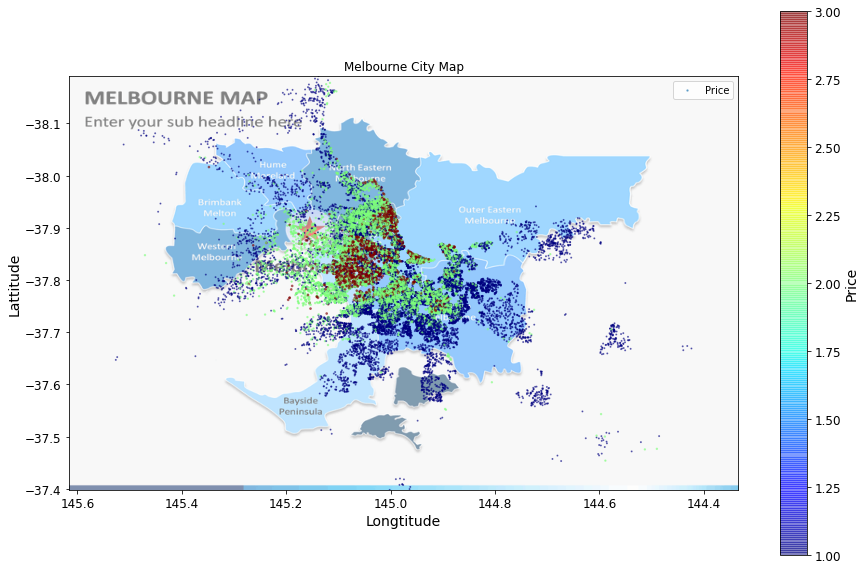

In [197]:
import matplotlib.image as mpimg
housing.plot(kind="scatter",x="Longtitude", y="Lattitude" , alpha=0.5,
    s=housing["Price"], label="Price", figsize=(15,10),
    c="Price", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)


california_img=mpimg.imread("melbourne1.png")
y_min, y_max, x_min, x_max = housing["Lattitude"].min(), housing["Lattitude"].max(), housing["Longtitude"].min(), housing["Longtitude"].max()
plt.imshow(california_img, extent=[x_max+0.09, x_min-0.09, y_max, y_min], alpha=0.5, cmap=plt.get_cmap("jet"), )
plt.title("Melbourne City Map")
plt.show()

## 4.2/ Handling with missing value

In [198]:
null_values_column_percentage(housing)

Distance : 0.004 %
Bedroom2 : 23.639 %
Bathroom : 23.661 %
Car : 25.045 %
Landsize : 34.004 %
YearBuilt : 55.65 %
CouncilArea : 0.011 %
Lattitude : 22.953 %
Longtitude : 22.953 %
Regionname : 0.011 %


<b>split data into train set and test set</b>

In [199]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, housing_index in split.split(housing, housing["Price"]):
    strat_train_set = housing.iloc[train_index]
    strat_test_set = housing.iloc[housing_index]

In [200]:
strat_train_set["Price"].value_counts()

1    13197
2     7107
3     1493
Name: Price, dtype: int64

In [201]:
strat_test_set["Price"].value_counts()

1    3300
2    1777
3     373
Name: Price, dtype: int64

# a/ Num attrbs

In [202]:
num_housing = strat_train_set[[attrb for attrb in strat_train_set.columns if attrb in num_attrb]]

In [203]:
num_housing.columns

Index(['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'YearBuilt', 'Lattitude', 'Longtitude'],
      dtype='object')

In [204]:
null_values_column_percentage(num_housing)

Distance : 0.005 %
Bedroom2 : 23.797 %
Bathroom : 23.82 %
Car : 25.146 %
Landsize : 34.138 %
YearBuilt : 55.898 %
Lattitude : 23.15 %
Longtitude : 23.15 %


In [205]:
X_train, Y_train = num_housing.drop("Price", axis=1), num_housing["Price"]

Fill missing numeric value with median strategy

In [206]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [207]:
imputer.fit(X_train)

SimpleImputer(strategy='median')

In [208]:
imputer.statistics_

array([ 3.000000e+00,  1.040000e+01,  3.000000e+00,  1.000000e+00,
        2.000000e+00,  5.070000e+02,  1.970000e+03, -3.780040e+01,
        1.450029e+02])

In [209]:
X_train = imputer.transform(X_train)

In [210]:
Y_train = pd.DataFrame(data=Y_train, columns=["Price"])

In [211]:
X_train = pd.DataFrame(data=X_train, columns=[att for att in num_attrb if att != "Price"])

In [212]:
null_values_column_percentage(X_train)

Nothing is missing !!!


In [213]:
X_train.head()

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,YearBuilt,Lattitude,Longtitude
0,2.0,7.3,3.0,1.0,2.0,507.0,1970.0,-37.80040,145.00290
1,3.0,13.0,3.0,1.0,4.0,640.0,1950.0,-37.69860,144.92430
2,3.0,5.9,3.0,1.0,1.0,450.0,1920.0,-37.77560,144.91480
3,4.0,14.0,4.0,2.0,2.0,447.0,1996.0,-37.75405,144.82014
4,4.0,17.9,4.0,2.0,2.0,507.0,1980.0,-37.66190,145.06810


# b/ Cat Attrbs

In [214]:
cat_housing = strat_train_set[[attrb for attrb in strat_train_set.columns if attrb in cat_attrb]]

In [215]:
null_values_column_percentage(cat_housing)

CouncilArea : 0.014 %
Regionname : 0.014 %


In [216]:
housing[housing["Regionname"].isnull()]

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Bedroom2,Bathroom,Car,Landsize,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname
18523,Footscray,2,u,1,S,Jas,15/07/2017,5.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26888,Camberwell,2,h,1,VB,Jellis,11/11/2017,7.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29483,Fawkner Lot,3,h,1,SP,Brad,6/01/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [217]:
housing[housing["CouncilArea"].isnull()]

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Bedroom2,Bathroom,Car,Landsize,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname
18523,Footscray,2,u,1,S,Jas,15/07/2017,5.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26888,Camberwell,2,h,1,VB,Jellis,11/11/2017,7.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29483,Fawkner Lot,3,h,1,SP,Brad,6/01/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Only 3 instances are missing. Plus, all of these 3 have NaN values in 9/17 attributes.
=> Drop.

In [218]:
cat_housing=cat_housing[cat_housing.CouncilArea.notnull()]

In [219]:
null_values_column_percentage(cat_housing)

Nothing is missing !!!


In [220]:
# X_train_cat = pd.DataFrame(data=X_train_cat, columns=[cat_attrb])

In [221]:
# null_values_column_percentage(X_train_cat)

In [222]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

class onehot_encoder(BaseEstimator, TransformerMixin):
    def __init__(self, drop = 'first', sparse=False):
        self.encoder = OneHotEncoder(drop = drop,sparse = sparse)
        self.features_to_encode = []
        self.columns = []
    
    def fit(self, X, features_to_encode=cat_attrb):
        data = X.copy()
        data = pd.DataFrame(data=data, columns=cat_attrb)
        self.features_to_encode = features_to_encode
        data_to_encode = data[self.features_to_encode]
        self.columns = pd.get_dummies(data_to_encode,drop_first = True).columns
        self.encoder.fit(data_to_encode)
        return self
    
    def transform(self, X):
        data = X.copy()
        data = pd.DataFrame(data=data, columns=cat_attrb)
        data.reset_index(drop = True,inplace =True)
        data_to_encode = data[self.features_to_encode]
        data_left = data.drop(self.features_to_encode,axis = 1)
        
        data_encoded = pd.DataFrame(self.encoder.transform(data_to_encode),columns = self.columns)
        
        return self.encoder.transform(data_to_encode)


In [223]:
cat_encoder = onehot_encoder()

In [224]:
full_cat = housing[[attrb for attrb in housing.columns if attrb in cat_attrb]]
full_cat = pd.DataFrame(data=full_cat, columns=cat_attrb)

In [225]:
full_cat.shape

(27247, 7)

In [226]:
full_cat.columns

Index(['Suburb', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')

In [227]:
cat_encoder.fit(cat_housing, features_to_encode=cat_attrb)

onehot_encoder(drop=None, sparse=None)

In [228]:
z = cat_encoder.transform(cat_housing)

In [229]:
cat_housing.columns

Index(['Suburb', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')

In [230]:
housing.shape

(27247, 17)

In [231]:
cat_housing.shape

(21794, 7)

In [232]:
z.shape

(21794, 784)

# c/ Building Pipelines

In [233]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [270]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_attrb_selected = ["Rooms", "Distance", "Bedroom2", "Bathroom", "Car", "Landsize", "Lattitude", "Longtitude"]

num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(num_attrb_selected)),    
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler())
    ])


In [235]:
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X], index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

In [236]:
cat_attrb_selected = ["Suburb", "Type", "Method", "SellerG", "Date", "CouncilArea", "Regionname"]
cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(cat_attrb_selected)),
        ("imputer", MostFrequentImputer()),
        ('cat_encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))    
    ])

In [237]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attrb_selected),
        ("cat", cat_pipeline, cat_attrb_selected),
    ])


# 5/ Building Machine Learning Model

In [238]:
housing.columns

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date',
       'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'YearBuilt',
       'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname'],
      dtype='object')

In [239]:
import pandas

In [240]:
data = load_housing_data(PATH)

In [241]:
full_pipeline.fit(data.drop("Price", axis=1))

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('select_numeric',
                                                  DataFrameSelector(attribute_names=['Rooms',
                                                                                     'Distance',
                                                                                     'Bedroom2',
                                                                                     'Bathroom',
                                                                                     'Car',
                                                                                     'Landsize',
                                                                                     'Lattitude',
                                                                                     'Longtitude'])),
                                                 ('imputer',
                                                  SimpleI

In [86]:
from sklearn.model_selection import StratifiedShuffleSplit
housing = data.copy()
housing=housing[housing.Price.notnull()]
housing ["Price"] = pd.cut(price, bins=[0., 1.0, 2.0, np.inf], labels=[1, 2, 3])
split = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
for train_index, housing_index in split.split(housing, housing["Price"]):
    strat_train_set = housing.iloc[train_index]
    strat_test_set = housing.iloc[housing_index]

In [87]:
X_train, Y_train = strat_train_set.drop("Price", axis=1), strat_train_set["Price"]

In [88]:
X_train = full_pipeline.transform(X_train)

## 1/ K-Neighbors Classifier

In [95]:
import time
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=4)

start = time.time()
knn_clf.fit(X_train, Y_train)
knn_train_time = time.time() - start

In [96]:
from sklearn.model_selection import cross_val_score
knn_score = cross_val_score(knn_clf, X_train, Y_train,
                         scoring="accuracy", cv=10, verbose=2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ................................................. , total=  24.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   24.0s remaining:    0.0s


[CV] ................................................. , total=  23.9s
[CV]  ................................................................
[CV] ................................................. , total=  26.0s
[CV]  ................................................................
[CV] ................................................. , total=  27.3s
[CV]  ................................................................
[CV] ................................................. , total=  24.5s
[CV]  ................................................................
[CV] ................................................. , total=  23.8s
[CV]  ................................................................
[CV] ................................................. , total=  23.7s
[CV]  ................................................................
[CV] ................................................. , total=  23.8s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  4.1min finished


## 2/ SVM Classifier

In [97]:
from sklearn.svm import SVC
import time
svm_clf = SVC(gamma="auto", random_state=42, probability=True)

start = time.time()
svm_clf.fit(X_train, Y_train)
svm_train_time = time.time() - start

In [98]:
svm_clf.score(X_train, Y_train)

0.8103408725971464

In [99]:
svm_score = cross_val_score(svm_clf, X_train, Y_train,
                         scoring="accuracy", cv=10, verbose=2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ................................................. , total=15.2min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 15.2min remaining:    0.0s


[CV] ................................................. , total=15.0min
[CV]  ................................................................
[CV] ................................................. , total=15.5min
[CV]  ................................................................
[CV] ................................................. , total=16.8min
[CV]  ................................................................
[CV] ................................................. , total=16.5min
[CV]  ................................................................
[CV] ................................................. , total=14.9min
[CV]  ................................................................
[CV] ................................................. , total=14.9min
[CV]  ................................................................
[CV] ................................................. , total=22.8min
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 171.4min finished


## 3/ Random Forest Classifier

In [100]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)

start = time.time()
forest_clf.fit(X_train, Y_train)
forest_train_time = time.time() - start

In [101]:
forest_score = cross_val_score(forest_clf, X_train, Y_train,
                         scoring="accuracy", cv=10, verbose=2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ................................................. , total=  18.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   18.1s remaining:    0.0s


[CV] ................................................. , total=  14.5s
[CV]  ................................................................
[CV] ................................................. , total=  10.8s
[CV]  ................................................................
[CV] ................................................. , total=  12.5s
[CV]  ................................................................
[CV] ................................................. , total=  11.6s
[CV]  ................................................................
[CV] ................................................. , total=  10.0s
[CV]  ................................................................
[CV] ................................................. , total=  10.1s
[CV]  ................................................................
[CV] ................................................. , total=   9.8s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  2.0min finished


# 6/ Model's Evaluation 

## 6.1/ Accuracy

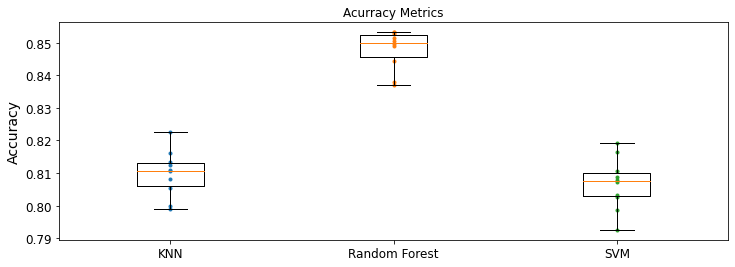

In [102]:
plt.figure(figsize=(12, 4))
plt.plot([1]*10, knn_score, ".")
plt.plot([2]*10, forest_score, ".")
plt.plot([3]*10, svm_score, ".")
plt.boxplot([knn_score, forest_score, svm_score], labels=("KNN", "Random Forest", "SVM"))
plt.ylabel("Accuracy", fontsize=14)
plt.title("Acurracy Metrics")
plt.show()

## 6.2/ Log Loss

In [104]:
# import pickle
# pickle.dump(svm_clf, open('SVM.pkl','wb'))
# pickle.dump(knn_clf, open('KNN.pkl','wb'))
# pickle.dump(forest_clf, open('RF.pkl','wb'))

In [3]:
# SVM = pickle.load(open('Pickle/SVM.pkl', 'rb'))
# KNN = pickle.load(open('Pickle/KNN.pkl', 'rb'))
# RF = pickle.load(open('Pickle/RF.pkl', 'rb'))

In [109]:
from sklearn.metrics import log_loss
X_test, Y_test = strat_test_set, strat_test_set["Price"]
X_test = full_pipeline.transform(X_test)

svm_logloss = log_loss(Y_test, SVM.predict_proba(X_test))
knn_logloss = log_loss(Y_test, KNN.predict_proba(X_test))
fr_logloss  = log_loss(Y_test, RF.predict_proba(X_test))

## 6.3/ F1 Score

In [110]:
from sklearn.metrics import f1_score
svm_f1score = f1_score(Y_test, SVM.predict(X_test), average='micro')
knn_f1score = f1_score(Y_test, KNN.predict(X_test), average='micro')
fr_f1score = f1_score(Y_test, RF.predict(X_test), average='micro')

## 6.4/ Score Table

In [111]:
Result = [
    ["SVM", svm_score.mean(), svm_logloss, svm_f1score, svm_train_time], 
    ["KNN", knn_score.mean(), knn_logloss, knn_f1score, knn_train_time], 
    ["Random Forrest", forest_score.mean(), fr_logloss, fr_f1score, forest_train_time]]

Result_pd = pd.DataFrame(data=Result, columns = ["Model", "Accuracy (%)", "Log Loss", "F1 Score", "Train Time (s)"])

In [112]:
Result_pd

,Model,Accuracy (%),Log Loss,F1 Score,Train Time (s)
0,SVM,0.806717,0.416929,0.816881,1072.007487
1,KNN,0.809835,1.803675,0.812477,2.245458
2,Random Forrest,0.847915,0.394605,0.859817,15.250090


# 7/ Fine-Tune Model

In [93]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
param_grid = {'C': [0.1, 0.5, 1], 'gamma': ['scale', 'auto'], 'kernel': ['linear',  'sigmoid', 'rbf']}

svm_grid_search = GridSearchCV(SVC(), param_grid, cv=5, verbose=3)
svm_grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] C=0.1, gamma=scale, kernel=linear ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ... C=0.1, gamma=scale, kernel=linear, score=0.842, total= 1.8min
[CV] C=0.1, gamma=scale, kernel=linear ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.8min remaining:    0.0s


[CV] ... C=0.1, gamma=scale, kernel=linear, score=0.840, total= 1.9min
[CV] C=0.1, gamma=scale, kernel=linear ...............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.7min remaining:    0.0s


[CV] ... C=0.1, gamma=scale, kernel=linear, score=0.836, total= 1.9min
[CV] C=0.1, gamma=scale, kernel=linear ...............................
[CV] ... C=0.1, gamma=scale, kernel=linear, score=0.836, total= 2.0min
[CV] C=0.1, gamma=scale, kernel=linear ...............................
[CV] ... C=0.1, gamma=scale, kernel=linear, score=0.839, total= 2.0min
[CV] C=0.1, gamma=scale, kernel=sigmoid ..............................
[CV] .. C=0.1, gamma=scale, kernel=sigmoid, score=0.746, total= 2.1min
[CV] C=0.1, gamma=scale, kernel=sigmoid ..............................
[CV] .. C=0.1, gamma=scale, kernel=sigmoid, score=0.720, total= 2.2min
[CV] C=0.1, gamma=scale, kernel=sigmoid ..............................
[CV] .. C=0.1, gamma=scale, kernel=sigmoid, score=0.728, total= 2.0min
[CV] C=0.1, gamma=scale, kernel=sigmoid ..............................
[CV] .. C=0.1, gamma=scale, kernel=sigmoid, score=0.744, total= 2.4min
[CV] C=0.1, gamma=scale, kernel=sigmoid ..............................
[CV] .

[CV] ..... C=1, gamma=scale, kernel=linear, score=0.840, total= 2.1min
[CV] C=1, gamma=scale, kernel=linear .................................
[CV] ..... C=1, gamma=scale, kernel=linear, score=0.836, total= 2.0min
[CV] C=1, gamma=scale, kernel=linear .................................
[CV] ..... C=1, gamma=scale, kernel=linear, score=0.833, total= 2.0min
[CV] C=1, gamma=scale, kernel=linear .................................
[CV] ..... C=1, gamma=scale, kernel=linear, score=0.831, total= 2.0min
[CV] C=1, gamma=scale, kernel=linear .................................
[CV] ..... C=1, gamma=scale, kernel=linear, score=0.842, total= 2.0min
[CV] C=1, gamma=scale, kernel=sigmoid ................................
[CV] .... C=1, gamma=scale, kernel=sigmoid, score=0.705, total= 1.5min
[CV] C=1, gamma=scale, kernel=sigmoid ................................
[CV] .... C=1, gamma=scale, kernel=sigmoid, score=0.706, total= 1.7min
[CV] C=1, gamma=scale, kernel=sigmoid ................................
[CV] .

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed: 214.1min finished


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 1], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'sigmoid', 'rbf']},
             verbose=3)

In [94]:
pickle.dump(svm_grid_search, open('Pickle/svm_grid.pkl','wb'))
# pickle.dump(open('Pickle/SVM_Grid.pkl', 'rb'))

In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5, 6, 7]}]

knn_clf = KNeighborsClassifier()
knn_grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3)
knn_grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_neighbors=3, weights=uniform ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... n_neighbors=3, weights=uniform, score=0.806, total=  34.2s
[CV] n_neighbors=3, weights=uniform ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   34.2s remaining:    0.0s


[CV] ...... n_neighbors=3, weights=uniform, score=0.811, total=  33.9s
[CV] n_neighbors=3, weights=uniform ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.1min remaining:    0.0s


[CV] ...... n_neighbors=3, weights=uniform, score=0.799, total=  34.9s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ...... n_neighbors=3, weights=uniform, score=0.809, total=  33.8s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ...... n_neighbors=3, weights=uniform, score=0.808, total=  33.3s
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.807, total=  33.2s
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.813, total=  33.7s
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.798, total=  34.6s
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.811, total=  33.4s
[CV] n_neighbors=3, weights=distance .................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 32.5min finished


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5, 6, 7],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

In [92]:
import pickle
pickle.dump(knn_grid_search, open('Pickle/knn_grid.pkl','wb'))

In [106]:
grid_search.best_score_

0.8161670886555499

In [108]:
grid_search.best_params_

{'n_neighbors': 5, 'weights': 'distance'}

In [126]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [127]:
from sklearn.ensemble import RandomForestClassifier
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, cv = 5, verbose = 3)

rf_random.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=False 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=False, score=0.853, total= 2.1min
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=False 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.1min remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=False, score=0.851, total= 2.0min
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=False 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  4.1min remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=False, score=0.842, total= 2.0min
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=False, score=0.844, total= 2.0min
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=False, score=0.853, total= 2.0min
[CV] n_estimators=1600, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=False 
[CV]  n_estimators=1600, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=False, score=0.851, total= 3.2min
[CV] n_estimators=1600, min_samples_split=2, min_samples_leaf=1, max_features=sqr

[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False, score=0.841, total=  21.2s
[CV] n_estimators=1400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False 
[CV]  n_estimators=1400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False, score=0.764, total= 1.3min
[CV] n_estimators=1400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False 
[CV]  n_estimators=1400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False, score=0.766, total= 1.4min
[CV] n_estimators=1400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False 
[CV]  n_estimators=1400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False, score=0.762, total= 1.3min
[CV] n_estimators=1400, min_samples_split=5, min_samples_leaf=1, max_features=auto

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 84.3min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   verbose=3)